# Финальная работа по курсу Введение в Data Science

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import pickle
from datetime import datetime
from statistics import mode
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

## Импорт датасета

In [2]:
# Импортируем датасет с информацией о действиях пользователей

df_hits = pd.read_csv('data/ga_hits-001.csv', low_memory=False)
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [4]:
# Импортируем датасет с информацией о пользователях

df_session = pd.read_csv('data/ga_sessions.csv', low_memory=False)
df_session.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [6]:
# Выделим целевые действия

target = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 
          'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 
          'sub_submit_success', 'sub_car_request_submit_click']
df_target = df_hits[df_hits['event_action'].isin(target)]
df_target.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
4016,2744563715298057088.1640258436.1640258436,2021-12-23,843092.0,81,event,NaN,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4045,3087297479839089634.1640268774.1640268774,2021-12-23,194144.0,22,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4046,3156966333326004302.1640206419.1640206800,2021-12-23,327223.0,63,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4047,3750243879753098158.1640272208.1640272208,2021-12-23,156992.0,20,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4048,7518333712042258254.1640258901.1640258901,2021-12-23,170616.0,16,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS,NaN


In [7]:
# Распределение по целевым действиям

df_target['event_action'].value_counts()

sub_car_claim_click                 37928
sub_open_dialog_click               25870
sub_submit_success                  18439
sub_car_claim_submit_click          12359
sub_call_number_click                3653
sub_callback_submit_click            3074
sub_car_request_submit_click         2966
sub_custom_question_submit_click      619
Name: event_action, dtype: int64

In [8]:
# Создадим новый признак event - факт совершения целевого действия
# 0 - не совершено, 1 - совершено

df_session['event'] = df_session['session_id'].isin(df_target['session_id']).astype(int)
df_session['event'].value_counts()

0    1809728
1      50314
Name: event, dtype: int64

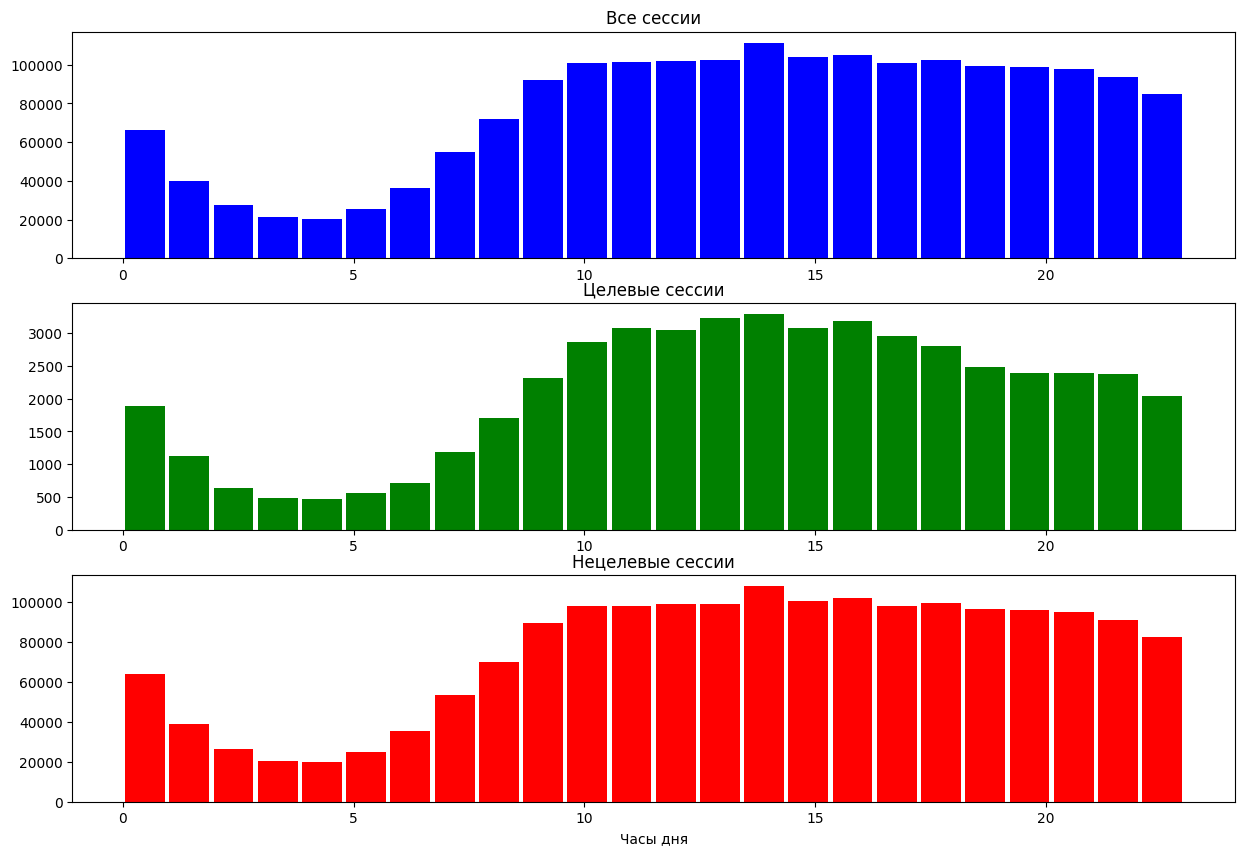

In [9]:
# Построим графики распределения посещения сервиса по часам

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

ax1.hist(pd.to_datetime(df_session['visit_time']).apply(lambda x: x.hour), bins=24, color='b', rwidth=0.9)
ax1.set_title('Все сессии')

ax2.hist(pd.to_datetime(df_session[df_session['event'] == 1]['visit_time']).apply(lambda x: x.hour), bins=24, color='g', rwidth=0.9)
ax2.set_title('Целевые сессии')

ax3.hist(pd.to_datetime(df_session[df_session['event'] == 0]['visit_time']).apply(lambda x: x.hour), bins=24, color='r', rwidth=0.9)
ax3.set_title('Нецелевые сессии')
ax3.set_xlabel('Часы дня');

In [10]:
# Уберем лишние колонки

df_session = df_session.drop(columns=['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number'])
df_session.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0


In [11]:
# Сохраним часть полностью непустых примеров в df_sample для проверки сервиса

df_sample1 = df_session[df_session['event'] == 0].dropna().sample(n=100, random_state=12)
df_sample2 = df_session[df_session['event'] == 1].dropna().sample(n=100, random_state=12)

pd.concat([df_sample1, df_sample2]).drop(columns='event').to_csv('data/df_sample.csv', index_label=False, sep=',')

df_session.dropna().drop(columns='event').sample(n=1, random_state=12).to_json('data/json_sample.json', orient="records")

In [12]:
df = df_session.copy()

## Data Preparation

### Преобразование типов данных

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 14 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   utm_source                object
 1   utm_medium                object
 2   utm_campaign              object
 3   utm_adcontent             object
 4   utm_keyword               object
 5   device_category           object
 6   device_os                 object
 7   device_brand              object
 8   device_model              object
 9   device_screen_resolution  object
 10  device_browser            object
 11  geo_country               object
 12  geo_city                  object
 13  event                     int32 
dtypes: int32(1), object(13)
memory usage: 191.6+ MB


In [14]:
pd.set_option('display.max_columns', None)
df.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0


In [15]:
# Приведем нечисловые признаки к строковому типу

feature_to_str = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_category', 
                  'device_os', 'device_brand', 'device_model', 'device_screen_resolution', 
                  'device_browser', 'geo_country',  'geo_city']

for x in feature_to_str:
    df[x] = df[x].dropna().astype('str')

### Обработка пропусков

In [16]:
# Функция подсчета полностью заполненных объектов

def print_useful_rows_info(data):
    print('Количество полностью заполненных объектов: ', len(data.dropna()))
    print('Процент от всех записей: ', len(data.dropna()) / len(data) * 100)
    
print_useful_rows_info(df)

Количество полностью заполненных объектов:  14940
Процент от всех записей:  0.8032076695042369


In [17]:
def print_missing_values(data):
    missing_values = (data.isna().sum() / len(data) * 100).sort_values(ascending = False)
    print('Процент пропущенных значений для каждого признака:\n', missing_values)

print_missing_values(df)

Процент пропущенных значений для каждого признака:
 device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
utm_medium                   0.000000
device_category              0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event                        0.000000
dtype: float64


#### Обработка пропусков в device_model

In [18]:
df['device_model'].value_counts(dropna=False)

NaN                     1843704
AuMdmADEIoPXiWpTsBEj       9778
tWBQlsvNfHxRUjaPAfhd        653
cwMJxNXiWUgMUxGiCTPs        651
pTgAEPipQxDXCjPrJbHo        461
                         ...   
LDCqZZOpaddysclyNkHj          1
MBGYWAQSYWUphNxTsAWD          1
VDidzTqFGxuqiRQJGrwB          1
aWSBcBZlKorTFjJGlWKG          1
niQdLVcBlNylrEuNcCYH          1
Name: device_model, Length: 105, dtype: int64

Заполним пропуски значением 'noname'

In [19]:
df['device_model'] = df['device_model'].fillna('noname')

In [20]:
df['device_model'].value_counts(dropna=False)

noname                  1843704
AuMdmADEIoPXiWpTsBEj       9778
tWBQlsvNfHxRUjaPAfhd        653
cwMJxNXiWUgMUxGiCTPs        651
pTgAEPipQxDXCjPrJbHo        461
                         ...   
LDCqZZOpaddysclyNkHj          1
MBGYWAQSYWUphNxTsAWD          1
VDidzTqFGxuqiRQJGrwB          1
aWSBcBZlKorTFjJGlWKG          1
niQdLVcBlNylrEuNcCYH          1
Name: device_model, Length: 105, dtype: int64

In [21]:
print_missing_values(df)

Процент пропущенных значений для каждого признака:
 utm_keyword                 58.174009
device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
utm_medium                   0.000000
device_category              0.000000
device_model                 0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event                        0.000000
dtype: float64


#### Обработка пропусков в utm_keyword

In [22]:
df['utm_keyword'].value_counts(dropna=False)

NaN                     1082061
puhZPIYqKXeFPaUviSjo     506819
aXQzDWsJuGXeBXexNHjc      24241
pHqgLcdBQPSLcrTpLkdr      13767
ITfrGJNwVsHBGJMAKoct      13353
                         ...   
XsuVVTgiDIxZtndPjvDm          1
WhaUakldaAmpLumfaADO          1
nJVPLgfxsBtPAXttNVDI          1
nwKBdMZKktIQFvhZwbFe          1
fcXWTQaKfxbkBkBnzLhK          1
Name: utm_keyword, Length: 1220, dtype: int64

Заполним пропуски значением 'other'

In [23]:
df['utm_keyword'] = df['utm_keyword'].fillna('other')

In [24]:
df['utm_keyword'].value_counts(dropna=False)

other                   1082061
puhZPIYqKXeFPaUviSjo     506819
aXQzDWsJuGXeBXexNHjc      24241
pHqgLcdBQPSLcrTpLkdr      13767
ITfrGJNwVsHBGJMAKoct      13353
                         ...   
XsuVVTgiDIxZtndPjvDm          1
WhaUakldaAmpLumfaADO          1
nJVPLgfxsBtPAXttNVDI          1
nwKBdMZKktIQFvhZwbFe          1
fcXWTQaKfxbkBkBnzLhK          1
Name: utm_keyword, Length: 1220, dtype: int64

In [25]:
print_missing_values(df)

Процент пропущенных значений для каждого признака:
 device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
utm_medium                   0.000000
utm_keyword                  0.000000
device_category              0.000000
device_model                 0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event                        0.000000
dtype: float64


#### Обработка пропусков в device_brand

##### Обработаем пропуски на десктопе

In [26]:
df.loc[df['device_category'] == 'desktop', ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
NaN           NaN          248136
              Windows       88291
              Macintosh     24804
              Linux          5063
              (not set)       344
              Chrome OS        83
Apple         NaN              39
              iOS              33
Huawei        NaN              16
(not set)     NaN               8
Xiaomi        Android           6
Samsung       NaN               5
Xiaomi        NaN               4
OPPO          NaN               4
Google        Android           4
Realme        NaN               4
Huawei        Android           3
Flexymove     Android           3
Samsung       Android           3
(not set)     Tizen             2
OnePlus       NaN               2
Beelink       NaN               2
Realme        Android           1
Nokia         NaN               1
Asus          NaN               1
Philips       NaN               1
dtype: int64

Заполним все десктопные устройства о которых одновременно не известно о бренде и OS значением 'other'

In [27]:
df.loc[(df['device_category'] == 'desktop') & df['device_brand'].isna() & df['device_os'].isna(), ['device_os', 'device_brand']] = 'other'

In [28]:
df.loc[df['device_category'] == 'desktop', ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
other         other        248136
NaN           Windows       88291
              Macintosh     24804
              Linux          5063
              (not set)       344
              Chrome OS        83
Apple         NaN              39
              iOS              33
Huawei        NaN              16
(not set)     NaN               8
Xiaomi        Android           6
Samsung       NaN               5
Xiaomi        NaN               4
OPPO          NaN               4
Google        Android           4
Realme        NaN               4
Huawei        Android           3
Flexymove     Android           3
Samsung       Android           3
(not set)     Tizen             2
OnePlus       NaN               2
Beelink       NaN               2
Realme        Android           1
Nokia         NaN               1
Asus          NaN               1
Philips       NaN               1
dtype: int64

In [29]:
df.loc[(df['device_category'] == 'desktop') & df['device_brand'].isna(), ['device_category', 'device_brand', 'device_os']].value_counts(dropna=False)

device_category  device_brand  device_os
desktop          NaN           Windows      88291
                               Macintosh    24804
                               Linux         5063
                               (not set)      344
                               Chrome OS       83
dtype: int64

Заполним пропуски во всех десктопах кроме Macintosh значением 'PC'

In [30]:
df.loc[(df['device_category'] == 'desktop') & df['device_brand'].isna() &
       ((df['device_os'] == 'Windows') | 
       (df['device_os'] == 'Linux') | 
       (df['device_os'] == 'Chrome OS') | 
       (df['device_os'] == '(not set)')), 
       'device_brand'].value_counts(dropna=False)

NaN    93781
Name: device_brand, dtype: int64

In [31]:
df.loc[(df['device_category'] == 'desktop') & df['device_brand'].isna() &
       ((df['device_os'] == 'Windows') | 
       (df['device_os'] == 'Linux') | 
       (df['device_os'] == 'Chrome OS') | 
       (df['device_os'] == '(not set)')), 
       'device_brand'] = 'PC'

In [32]:
df.loc[(df['device_category'] == 'desktop') &
       ((df['device_os'] == 'Windows') | 
       (df['device_os'] == 'Linux') | 
       (df['device_os'] == 'Chrome OS') | 
       (df['device_os'] == '(not set)')), 
       'device_brand'].value_counts(dropna=False)

PC    93781
Name: device_brand, dtype: int64

Компьютеры на Macintosh заполним брендом Apple

In [33]:
df.loc[df['device_os'] == 'Macintosh', 'device_brand'].value_counts(dropna=False)

NaN    24824
Name: device_brand, dtype: int64

In [34]:
df.loc[df['device_os'] == 'Macintosh', 'device_brand'] = 'Apple'

In [35]:
df.loc[df['device_os'] == 'Macintosh', 'device_brand'].value_counts(dropna=False)

Apple    24824
Name: device_brand, dtype: int64

##### Обработаем пропуски на смартфонах

In [36]:
df.loc[(df['device_category'] == 'mobile') & df['device_brand'].isna(), 
       ['device_category', 'device_brand', 'device_os']].value_counts(dropna=False)

device_category  device_brand  device_os
mobile           NaN           NaN          222
                               Linux         50
                               Windows       16
dtype: int64

Т.к. количество пропусков незначительно то удалим их в конце

##### Обработаем пропуски известных брендов на планшетах

In [37]:
df.loc[(df['device_category'] == 'tablet') & df['device_brand'].isna(), 
       ['device_category', 'device_brand', 'device_os']].value_counts(dropna=False)

device_category  device_brand  device_os
tablet           NaN           NaN          142
                               Linux          7
dtype: int64

Аналогично удалим остальные пропуски в конце

In [38]:
print_missing_values(df)

Процент пропущенных значений для каждого признака:
 device_os                   44.192658
utm_adcontent               18.043410
utm_campaign                11.806346
device_brand                 0.023494
utm_source                   0.005215
utm_medium                   0.000000
utm_keyword                  0.000000
device_category              0.000000
device_model                 0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event                        0.000000
dtype: float64


#### Обработка пропусков в device_os

##### Проверим пропуски в декстопах

In [39]:
df.loc[(df['device_category'] == 'desktop') & df['device_os'].isna(), ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
Apple         NaN          39
Huawei        NaN          16
(not set)     NaN           8
Samsung       NaN           5
OPPO          NaN           4
Realme        NaN           4
Xiaomi        NaN           4
Beelink       NaN           2
OnePlus       NaN           2
Asus          NaN           1
Nokia         NaN           1
Philips       NaN           1
dtype: int64

Десктопы Apple можно заполнить значением 'Macintosh'

In [40]:
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'desktop') & 
        df['device_os'].isna(), 'device_os'].value_counts(dropna=False)

NaN    39
Name: device_os, dtype: int64

In [41]:
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'desktop') & 
        df['device_os'].isna(), 'device_os'] = 'Macintosh'

In [42]:
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'desktop') & 
        df['device_os'].isna(), 'device_os'].value_counts(dropna=False)

Series([], Name: device_os, dtype: int64)

Остальные десктопы заполним значением 'Linux'

In [43]:
df.loc[(df['device_category'] == 'desktop') & df['device_os'].isna(), ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
Huawei        NaN          16
(not set)     NaN           8
Samsung       NaN           5
OPPO          NaN           4
Realme        NaN           4
Xiaomi        NaN           4
Beelink       NaN           2
OnePlus       NaN           2
Asus          NaN           1
Nokia         NaN           1
Philips       NaN           1
dtype: int64

In [44]:
df.loc[(df['device_category'] == 'desktop') & df['device_os'].isna(), 'device_os'] = 'Linux'

In [45]:
df.loc[(df['device_os'].isna()) & (df['device_category'] == 'desktop'), 'device_os'].value_counts(dropna=False)

Series([], Name: device_os, dtype: int64)

In [46]:
print_missing_values(df)

Процент пропущенных значений для каждого признака:
 device_os                   44.187981
utm_adcontent               18.043410
utm_campaign                11.806346
device_brand                 0.023494
utm_source                   0.005215
utm_medium                   0.000000
utm_keyword                  0.000000
device_category              0.000000
device_model                 0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event                        0.000000
dtype: float64


##### Проверим пропуски в смартфонах

In [47]:
df.loc[(df['device_category'] == 'mobile') & (df['device_os'].isna()), ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
Apple         NaN          339543
Samsung       NaN          163514
Xiaomi        NaN          147063
Huawei        NaN           93994
Realme        NaN            8189
                            ...  
Mlais         NaN               1
Tonbux        NaN               1
Maze          NaN               1
Maxvi         NaN               1
Dark          NaN               1
Length: 156, dtype: int64

Пропуски ОС в мобильных устройствах Apple заполним значением iOS

In [48]:
df.loc[(df['device_brand'] == 'Apple') & (df['device_category'] == 'mobile'), 'device_os'].value_counts(dropna=False)

NaN          339543
iOS          205250
Macintosh        10
Name: device_os, dtype: int64

In [49]:
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'desktop') & 
        df['device_os'].isna(), 'device_os'] = 'iOS'

In [50]:
df.loc[(df['device_brand'] == 'Apple') & (df['device_category'] == 'mobile'), 'device_os'].value_counts(dropna=False)

NaN          339543
iOS          205250
Macintosh        10
Name: device_os, dtype: int64

Остальные пропуским заполним значением 'Android'

In [51]:
df.loc[(df['device_category'] == 'mobile') & df['device_os'].isna(), 'device_os'] = 'Android'

In [52]:
print_missing_values(df)

Процент пропущенных значений для каждого признака:
 utm_adcontent               18.043410
utm_campaign                11.806346
device_os                    0.625470
device_brand                 0.023494
utm_source                   0.005215
utm_medium                   0.000000
utm_keyword                  0.000000
device_category              0.000000
device_model                 0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event                        0.000000
dtype: float64


##### Проверим пропуски на планшетах

In [53]:
df.loc[(df['device_category'] == 'tablet') & (df['device_os'].isna()), ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
Apple         NaN          4408
Samsung       NaN          2991
Huawei        NaN          2125
Lenovo        NaN           955
Google        NaN           307
Xiaomi        NaN           157
NaN           NaN           142
Tecno         NaN           119
Sony          NaN           104
(not set)     NaN            85
Asus          NaN            70
BQ            NaN            20
Teclast       NaN            18
Chuwi         NaN            17
Acer          NaN            13
Prestigio     NaN            10
OPPO          NaN             9
DEXP          NaN             7
Alldocube     NaN             5
Amazon        NaN             5
Kingplay      NaN             5
H96           NaN             4
Oysters       NaN             4
Alcatel       NaN             4
Winnovo       NaN             3
Symphony      NaN             3
Archos        NaN             3
Land Rover    NaN             3
RCA           NaN             2
OnePlus       NaN             2
Realme        Na

Все ОС на планшетах Apple так же заполним значением 'iOS'

In [54]:
df.loc[(df['device_brand'] == 'Apple') & (df['device_category'] == 'tablet'), 'device_os'].value_counts(dropna=False)

NaN          4408
iOS          1815
Macintosh      10
Name: device_os, dtype: int64

In [55]:
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'tablet') & 
        df['device_os'].isna(), 'device_os'] = 'iOS'

In [56]:
df.loc[(df['device_brand'] == 'Apple') & (df['device_category'] == 'tablet'), 'device_os'].value_counts(dropna=False)

iOS          6223
Macintosh      10
Name: device_os, dtype: int64

Остальные пропуским заполним значением 'Android'

In [57]:
df.loc[df['device_os'].isna() & (df['device_category'] == 'tablet'), 'device_os'] = 'Android'

Убедимся, что в поле device_os не осталось пропусков

In [58]:
len(df[df['device_os'].isna()])

0

In [59]:
print_missing_values(df)

Процент пропущенных значений для каждого признака:
 utm_adcontent               18.043410
utm_campaign                11.806346
device_brand                 0.023494
utm_source                   0.005215
utm_medium                   0.000000
utm_keyword                  0.000000
device_category              0.000000
device_os                    0.000000
device_model                 0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event                        0.000000
dtype: float64


#### Обработка пропусков в utm_adcontent

In [60]:
df['utm_adcontent'].value_counts(dropna=False)

JNHcPlZPxEMWDnRiyoBf    1006599
NaN                      335615
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
                         ...   
vXARZToVDdvNhALiQtvl          1
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
oJivRDNIrrOckRBIKOtG          1
Name: utm_adcontent, Length: 287, dtype: int64

Заполним пропуски значением 'other'

In [61]:
df['utm_adcontent'] = df['utm_adcontent'].fillna('other')

In [62]:
df['utm_adcontent'].value_counts(dropna=False)

JNHcPlZPxEMWDnRiyoBf    1006599
other                    335615
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
                         ...   
vXARZToVDdvNhALiQtvl          1
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
oJivRDNIrrOckRBIKOtG          1
Name: utm_adcontent, Length: 287, dtype: int64

In [63]:
print_missing_values(df)

Процент пропущенных значений для каждого признака:
 utm_campaign                11.806346
device_brand                 0.023494
utm_source                   0.005215
utm_medium                   0.000000
utm_adcontent                0.000000
utm_keyword                  0.000000
device_category              0.000000
device_os                    0.000000
device_model                 0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event                        0.000000
dtype: float64


#### Обработка пропусков в utm_campaign

In [64]:
df['utm_campaign'].value_counts(dropna=False)

LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
NaN                     219603
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
RkpOyeEPgcMBSDuHLQcj         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
MHdHrBKQwbDaRalwnlJq         1
cXxuwXPoQCvAXPHpFcZl         1
Name: utm_campaign, Length: 413, dtype: int64

Заполним пропуски значением 'other'

In [65]:
df['utm_campaign'] = df['utm_campaign'].fillna('other')

In [66]:
df['utm_campaign'].value_counts(dropna=False)

LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
other                   219603
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
RkpOyeEPgcMBSDuHLQcj         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
MHdHrBKQwbDaRalwnlJq         1
cXxuwXPoQCvAXPHpFcZl         1
Name: utm_campaign, Length: 413, dtype: int64

In [67]:
print_missing_values(df)

Процент пропущенных значений для каждого признака:
 device_brand                0.023494
utm_source                  0.005215
utm_medium                  0.000000
utm_campaign                0.000000
utm_adcontent               0.000000
utm_keyword                 0.000000
device_category             0.000000
device_os                   0.000000
device_model                0.000000
device_screen_resolution    0.000000
device_browser              0.000000
geo_country                 0.000000
geo_city                    0.000000
event                       0.000000
dtype: float64


#### Обработка пропусков в utm_source

In [68]:
df['utm_source'].value_counts(dropna=False)

ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
wpmatvDuiMutnvmNVPJo         1
BellrslNBZQZaIxVFGXJ         1
Name: utm_source, Length: 294, dtype: int64

In [69]:
len(df[df['utm_source'].isna()])

97

Удалим все пропуски, в том числе которые оставались до этого

In [70]:
df = df.dropna()

In [71]:
print_missing_values(df)

Процент пропущенных значений для каждого признака:
 utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
utm_keyword                 0.0
device_category             0.0
device_os                   0.0
device_brand                0.0
device_model                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
event                       0.0
dtype: float64


### Кодирование категориальных переменных

In [72]:
# Выведем категориальные переменные

columns = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
           'utm_keyword', 'device_category', 'device_os', 'device_brand',
           'device_model', 'device_screen_resolution', 'device_browser',
           'geo_country', 'geo_city']
for column in columns:
    print(column, df[column].nunique())

utm_source 293
utm_medium 52
utm_campaign 413
utm_adcontent 287
utm_keyword 1220
device_category 3
device_os 14
device_brand 207
device_model 105
device_screen_resolution 5037
device_browser 57
geo_country 166
geo_city 2548


In [73]:
# Сделаем составной датасет где количество положительных событий не сильно отличалось от количества нецелевых

n_event = len(df[df['event'] == 1])
df_short = pd.concat([df[df['event'] == 1], df[df['event'] == 0].sample(n=2*n_event, random_state=12)]).reset_index(drop=True)

In [74]:
df_short.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Huawei,noname,360x780,Chrome,Russia,Moscow,1
1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,noname,414x736,Safari,Russia,Samara,1
2,BHcvLfOaCWvWTykYqHVe,cpc,other,other,other,desktop,other,other,noname,834x1112,Safari,Russia,Domodedovo,1
3,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,412x915,YaBrowser,Russia,Krasnodar,1
4,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,360x740,Chrome,Russia,Moscow,1


In [75]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150912 entries, 0 to 150911
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   utm_source                150912 non-null  object
 1   utm_medium                150912 non-null  object
 2   utm_campaign              150912 non-null  object
 3   utm_adcontent             150912 non-null  object
 4   utm_keyword               150912 non-null  object
 5   device_category           150912 non-null  object
 6   device_os                 150912 non-null  object
 7   device_brand              150912 non-null  object
 8   device_model              150912 non-null  object
 9   device_screen_resolution  150912 non-null  object
 10  device_browser            150912 non-null  object
 11  geo_country               150912 non-null  object
 12  geo_city                  150912 non-null  object
 13  event                     150912 non-null  int32 
dtypes: i

In [76]:
df_short['event'].value_counts()

0    100608
1     50304
Name: event, dtype: int64

In [77]:
# Закодируем категориальные переменные

ohe = OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False, max_categories=100)
ohe.fit(df_short.drop(columns='event')[columns])

OneHotEncoder(handle_unknown='infrequent_if_exist', max_categories=100,
              sparse_output=False)

In [78]:
df_short.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Huawei,noname,360x780,Chrome,Russia,Moscow,1
1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,noname,414x736,Safari,Russia,Samara,1
2,BHcvLfOaCWvWTykYqHVe,cpc,other,other,other,desktop,other,other,noname,834x1112,Safari,Russia,Domodedovo,1
3,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,412x915,YaBrowser,Russia,Krasnodar,1
4,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,360x740,Chrome,Russia,Moscow,1


In [79]:
ohe_columns = ohe.transform(df_short[columns])
ohe_columns

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
ohe_columns.shape

(150912, 941)

In [81]:
df_prepared = pd.concat([pd.DataFrame(ohe_columns, columns=ohe.get_feature_names_out()), df_short['event']], axis=1)

In [82]:
df_prepared

utm_source_AHgbtEjTEsiUMJouiDYS  utm_source_BHcvLfOaCWvWTykYqHVe  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              1.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   
...                                 ...                              ...   
150907                              0.0                              0.0   
150908                              0.0                              0.0   
150909                              0.0                              0.0   
150910                              0.0                              0.0   
150911                              0.0                              0.0   

        utm_source_BKeImrJuRDZcHiSSTdzm  utm_source_CFeqZLBNQdYHxJrTOHjY  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   
...                                 ...                              ...   
150907                              0.0                              0.0   
150908                              0.0                              0.0   
150909                              0.0                              0.0   
150910                              0.0                              0.0   
150911                              0.0                              0.0   

        utm_source_CgsxHpdTmXHvrHqEKRxp  utm_source_DlnuGwaJBHGNEKdWfOpe  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   
...                                 ...                              ...   
150907                              0.0                              0.0   
150908                              0.0                              0.0   
150909                              0.0                              0.0   
150910                              0.0                              0.0   
150911                              0.0                              0.0   

        utm_source_DnEUulZAecfGPvdtZBYS  utm_source_DnxUhHWInKVDAWzwROOC  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   
...                                 ...                              ...   
150907                              0.0                              0.0   
150908                              0.0                              0.0   
150909                              0.0                              0.0   
150910                              0.0                              0.0   
150911                              0.0                              0.0   

        utm_source_EvhrtRzIJnQYHziPiLzV  utm_source_FTAuYVNoYYxgvKMpKSLW  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0             

In [83]:
df_prepared['event'].value_counts()

0    100608
1     50304
Name: event, dtype: int64

In [84]:
df_prepared.head()

,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_EvhrtRzIJnQYHziPiLzV,utm_source_FTAuYVNoYYxgvKMpKSLW,utm_source_GmILPdZyuAVJCPsUBHeN,utm_source_GpAkIXsclxDGyILfNlrR,utm_source_HFaOtpcChAlcMuxEAlpu,utm_source_HbolMJUevblAbkHClEQa,utm_source_ISrKoXQCxqqYvAZICvjs,utm_source_IZEXUFLARCUMynmHNBGo,utm_source_IsHcZJuNYwanAAEDxuOE,utm_source_KgicpPxiEQfzPlPwQZJq,utm_source_LIWKeifdTCbuNeniIUqm,utm_source_LkGnzVRewoaOHnMCwadT,utm_source_LlBOVIARRTjfgnQNjJre,utm_source_MQvSjpHGoGjbcBjfnLLm,utm_source_MYrKypXYDhDVwJMUhCqu,utm_source_MlvrtLODeciGJoIzwoNf,utm_source_MvfHsxITijuriZxsqZqt,utm_source_NGNkCWwKgYFmiCCeZVxg,utm_source_NTQAiqAhSTbkRRmxVKoQ,utm_source_NwLFDlNWnYxuLZEAZppl,utm_source_NwuIyBhuPCXhJVPLtXCC,utm_source_PKriXrefSFPLBYtCRGSE,utm_source_PlbkrSYoHuZBWfYjYnfw,utm_source_PsRRjEPKVbKXDDjZTzqz,utm_source_QKpFeggpjKAvhtjHKHZC,utm_source_QYfbqJXuLdJGfOSFgZOs,utm_source_QxAxdyPLuQMEcrdZWdWb,utm_source_QzPMrfYhYSLYYPtPaBxI,utm_source_RVKHNCFOYpjJjjAtwCgE,utm_source_RmEBuqrriAfAVsLQQmhk,utm_source_RxecHElWobBxIeAkqFXV,utm_source_SzZERoLMmrEUEhDaYcyN,utm_source_TTtiRKFZIaQpIWggfCoF,utm_source_TxKUcPpthBDPieTGmVhx,utm_source_UphNUPPFIJLIZnvubKDj,utm_source_WEXkMlsnJodrzBgKJBpG,utm_source_WeIwsqEbpZGZwhcQktNS,utm_source_WiILFRDQbcHDHNvHzGpX,utm_source_XiUifkjKLLnomcDRhswp,utm_source_YECMcEASiXejEJmgUmEG,utm_source_YclHumxPxSxgzHfvCaeF,utm_source_YlsczTIyBSwTLNtuDkCd,utm_source_ZHCJROlbqnkXTqIuVxnm,utm_source_ZpYIoDJMcFzVoPFsHGJL,utm_source_aXQzDWsJuGXeBXexNHjc,utm_source_azajeHUvPOKkHBvWFbjz,utm_source_bByPQxmDaMXgpHeypKSM,utm_source_bxOTvPtyGSdUrbwoXCPO,utm_source_cAqxcRdSSFAyCPUxQHqy,utm_source_dyicZQGoeASogoSafjEh,utm_source_eLzNJHzPelJpEyBwMrKo,utm_source_eimRuUrNhZLAYcwRrNXu,utm_source_fDLlAcSmythWSCVMvqvL,utm_source_fJCYsujgSxIHFbOmgDdN,utm_source_faqsogjxCvbseFqupueU,utm_source_fbFKcMumlScApQMqFIqp,utm_source_fcXWTQaKfxbkBkBnzLhK,utm_source_fgymSoTvjKPEgaIJqsiH,utm_source_gDBGzjFKYabGgSPZvrDH,utm_source_gVRrcxiDQubJiljoTbGm,utm_source_geDcueAOghDzHkGMmdOq,utm_source_ghoaGAksqhKomdFrxgyJ,utm_source_hTjLvqNxGggkGnxSCaTm,utm_source_hzrqPZyPrRXcOdyjRQRg,utm_source_iNFgfQPqHPBuvGCYtrQE,utm_source_jaSOmLICuBzCFqHfBdRg,utm_source_juYouSPHPfKdXivEPJjt,utm_source_kjsLglQLzykiRbcDiGcD,utm_source_klTrhUaShgnjIbaPmqjc,utm_source_mNTexKeDdCADhrBgkEeA,utm_source_maiZOsuEAMdeoRVsYoFk,utm_source_mtQufDECJCXyKwpKQPvz,utm_source_nSReTmyFtbSjlPrTKoaX,utm_source_ngkgBNjlzLYBofkljaBo,utm_source_nmfptFmSirEqNzAzqbXA,utm_source_nrKihqcWGIzDsOqljdAv,utm_source_oCqKpnSZJeYOVZTgTmKR,utm_source_oZCzWSykfixnjMPDNjSU,utm_source_pvCdohkUBGPPZOsCzVAu,utm_source_qVXuCoVQtPxcUkAXiXBa,utm_source_rgsINTLYFsElIlfRtNDP,utm_source_sOTrgtUMUuYzzWBPLeFQ,utm_source_tzIeQUUHahhBuEkJqDVp,utm_source_vDZlJSHSNetCcaizwODS,utm_source_vEBWkLmuIpqNdxZZdlnW,utm_source_vFcAhRxLfOWKhvxjELkx,utm_source_vNNYHvZtTVtJICHsjBBL,utm_source_wlyUPieAGrQNIlkbmySd,utm_source_ySpKPVDYCgmkHVSeLjnJ,utm_source_zhqxcsahQYAzJvRzebNp,utm_source_zwpKjjsMoRVCdipntaHt,utm_source_infrequent_sklearn,utm_medium_(none),utm_medium_(not set),utm_medium_app,utm_medium_article,utm_medium_banner,utm_medium_blogger_channel,utm_medium_blogger_header,utm_medium_blogger_stories,utm_medium_cbaafe,utm_medium_clicks,utm_medium_cpa,utm_medium_cpc,utm_medium_cpm,utm_medium_cpv,utm_medium_dom_click,utm_medium_email,utm_medium_fb_smm,utm_medium_info_text,utm_medium_landing,utm_medium_link,utm_medium_medium,utm_medium_ok_smm,utm_medium_organic,utm_medium_outlook,utm_medium_partner,utm_medium_post,utm_medium_push,utm_medium_qr,utm_medium_referral,utm_medium_smartbanner,utm_medium_smm,utm_medium_sms,utm_medium_social,utm_medium_static,utm_medium_stories,utm_medium_tg,utm_medium_vk_smm,utm_medium_yandex_cpc,utm_campaign_AqudXfUnmXWSDWVGYaXr,utm_campaign_BVKxkCOHKUOvkpbrLMgZ,utm_campaign_CdkIkBrvEVomSgvHzYvj

In [85]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150912 entries, 0 to 150911
Columns: 942 entries, utm_source_AHgbtEjTEsiUMJouiDYS to event
dtypes: float64(941), int32(1)
memory usage: 1.1 GB


In [86]:
df_modeling = df_prepared.copy()

## Modeling

### Инициализация датасета и разделение на train и test

In [87]:
# Выделим фичи и целевую переменную
x = df_modeling.drop(['event'], axis=1)
y = df_modeling['event']

# Разделим на train и test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=12)

In [88]:
df_modeling

utm_source_AHgbtEjTEsiUMJouiDYS  utm_source_BHcvLfOaCWvWTykYqHVe  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              1.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   
...                                 ...                              ...   
150907                              0.0                              0.0   
150908                              0.0                              0.0   
150909                              0.0                              0.0   
150910                              0.0                              0.0   
150911                              0.0                              0.0   

        utm_source_BKeImrJuRDZcHiSSTdzm  utm_source_CFeqZLBNQdYHxJrTOHjY  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   
...                                 ...                              ...   
150907                              0.0                              0.0   
150908                              0.0                              0.0   
150909                              0.0                              0.0   
150910                              0.0                              0.0   
150911                              0.0                              0.0   

        utm_source_CgsxHpdTmXHvrHqEKRxp  utm_source_DlnuGwaJBHGNEKdWfOpe  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   
...                                 ...                              ...   
150907                              0.0                              0.0   
150908                              0.0                              0.0   
150909                              0.0                              0.0   
150910                              0.0                              0.0   
150911                              0.0                              0.0   

        utm_source_DnEUulZAecfGPvdtZBYS  utm_source_DnxUhHWInKVDAWzwROOC  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   
...                                 ...                              ...   
150907                              0.0                              0.0   
150908                              0.0                              0.0   
150909                              0.0                              0.0   
150910                              0.0                              0.0   
150911                              0.0                              0.0   

        utm_source_EvhrtRzIJnQYHziPiLzV  utm_source_FTAuYVNoYYxgvKMpKSLW  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0             

In [89]:
df_modeling['event'].value_counts()

0    100608
1     50304
Name: event, dtype: int64

### Логистическая регрессия

In [90]:
# Подбор параметров модели логистической регрессии
parameters_logreg = {'C': [0.25, 0.5, 1, 2]}

logreg = LogisticRegression(solver='liblinear',
                            class_weight='balanced',
                            tol=1e-6,
                            random_state=12)

clf_logreg = GridSearchCV(logreg, parameters_logreg, cv=4, scoring='roc_auc', verbose=100)
clf_logreg.fit(x_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4; 1/4] START C=0.25......................................................
[CV 1/4; 1/4] END .......................C=0.25;, score=0.686 total time=   4.1s
[CV 2/4; 1/4] START C=0.25......................................................
[CV 2/4; 1/4] END .......................C=0.25;, score=0.687 total time=   2.0s
[CV 3/4; 1/4] START C=0.25......................................................
[CV 3/4; 1/4] END .......................C=0.25;, score=0.690 total time=   2.2s
[CV 4/4; 1/4] START C=0.25......................................................
[CV 4/4; 1/4] END .......................C=0.25;, score=0.691 total time=   2.0s
[CV 1/4; 2/4] START C=0.5.......................................................
[CV 1/4; 2/4] END ........................C=0.5;, score=0.686 total time=   2.4s
[CV 2/4; 2/4] START C=0.5.......................................................
[CV 2/4; 2/4] END ........................C=0.5;,

GridSearchCV(cv=4,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=12, solver='liblinear',
                                          tol=1e-06),
             param_grid={'C': [0.25, 0.5, 1, 2]}, scoring='roc_auc',
             verbose=100)

In [91]:
pd.DataFrame(clf_logreg.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,2.646547,0.878960,0.037956,0.006954,0.25,{'C': 0.25},0.686105,0.686667,0.690307,0.691390,0.688617,0.002272,1
1,2.457028,0.150479,0.042222,0.006428,0.5,{'C': 0.5},0.686116,0.686568,0.690322,0.691071,0.688519,0.002199,2
2,2.893073,0.101603,0.041666,0.006347,1,{'C': 1},0.685963,0.686280,0.690116,0.690620,0.688245,0.002134,3
3,3.748702,0.095341,0.039511,0.011565,2,{'C': 2},0.685723,0.685949,0.689922,0.690251,0.687961,0.002130,4


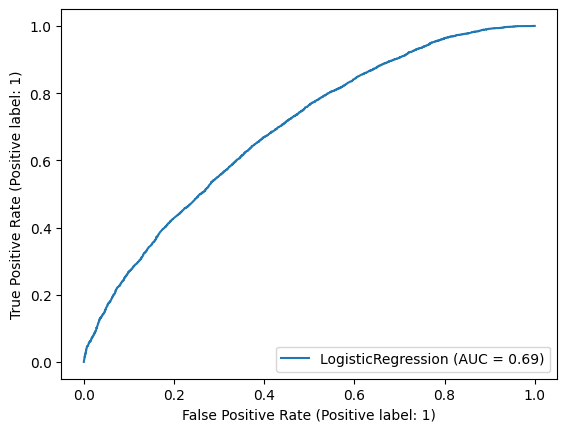

In [92]:
RocCurveDisplay.from_estimator(clf_logreg.best_estimator_, x_test, y_test)
plt.show();

### Случайный лес

In [93]:
# Подбор параметров модели случайного леса
parameters_rf = {'min_samples_split': [2, 3, 4]}

rf = RandomForestClassifier(n_estimators=100,
                            max_features='sqrt',
                            min_samples_leaf=2,
                            bootstrap=False,
                            max_depth=100,
                            n_jobs=-1,
                            random_state=12)

clf_rf = GridSearchCV(rf, parameters_rf, cv=4, scoring='roc_auc', verbose=100)
clf_rf.fit(x_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV 1/4; 1/3] START min_samples_split=2.........................................
[CV 1/4; 1/3] END ..........min_samples_split=2;, score=0.693 total time=  14.0s
[CV 2/4; 1/3] START min_samples_split=2.........................................
[CV 2/4; 1/3] END ..........min_samples_split=2;, score=0.692 total time=  13.2s
[CV 3/4; 1/3] START min_samples_split=2.........................................
[CV 3/4; 1/3] END ..........min_samples_split=2;, score=0.698 total time=  13.1s
[CV 4/4; 1/3] START min_samples_split=2.........................................
[CV 4/4; 1/3] END ..........min_samples_split=2;, score=0.701 total time=  12.7s
[CV 1/4; 2/3] START min_samples_split=3.........................................
[CV 1/4; 2/3] END ..........min_samples_split=3;, score=0.693 total time=  12.2s
[CV 2/4; 2/3] START min_samples_split=3.........................................
[CV 2/4; 2/3] END ..........min_samples_split=3;,

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(bootstrap=False, max_depth=100,
                                              min_samples_leaf=2, n_jobs=-1,
                                              random_state=12),
             param_grid={'min_samples_split': [2, 3, 4]}, scoring='roc_auc',
             verbose=100)

In [94]:
pd.DataFrame(clf_rf.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,13.160631,0.469940,0.174317,0.008212,2,{'min_samples_split': 2},0.69264,0.692379,0.697953,0.700979,0.695988,0.00364,1
1,12.660318,0.948273,0.168800,0.002371,3,{'min_samples_split': 3},0.69264,0.692379,0.697953,0.700979,0.695988,0.00364,1
2,12.417824,0.203686,0.169688,0.013407,4,{'min_samples_split': 4},0.69264,0.692379,0.697953,0.700979,0.695988,0.00364,1


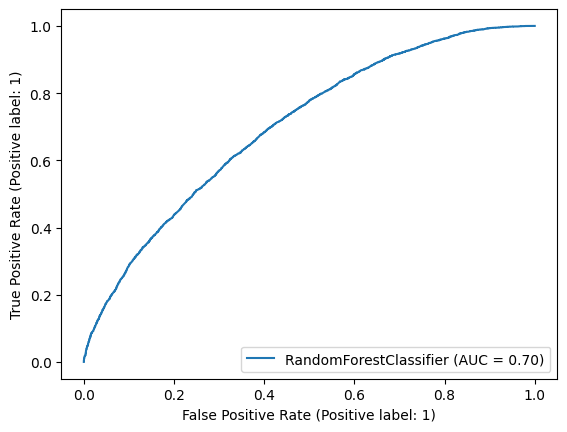

In [95]:
RocCurveDisplay.from_estimator(clf_rf.best_estimator_, x_test, y_test)
plt.show();

### Многослойный персептрон

In [96]:
# Подбор параметров модели многослойного персептрона
parameters_mlp = {'hidden_layer_sizes': [(2, 2), (5, 2)]}

mlp = MLPClassifier(activation='identity',
                    solver='lbfgs',
                    alpha=0.0001,
                    tol=1e-3,
                    max_iter=1000,
                    random_state=12)

clf_mlp = GridSearchCV(mlp, parameters_mlp, cv=4, scoring='roc_auc', verbose=100)
clf_mlp.fit(x_train, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 1/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.684 total time=   5.2s
[CV 2/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 2/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.685 total time=   5.4s
[CV 3/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 3/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.685 total time=   4.2s
[CV 4/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 4/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.689 total time=   3.8s
[CV 1/4; 2/2] START hidden_layer_sizes=(5, 2)...................................
[CV 1/4; 2/2] END ....hidden_layer_sizes=(5, 2);, score=0.682 total time=   4.6s
[CV 2/4; 2/2] START hidden_layer_sizes=(5, 2)...................................
[CV 2/4; 2/2] END ....hidden_layer_sizes=(5, 2);, 

GridSearchCV(cv=4,
             estimator=MLPClassifier(activation='identity', max_iter=1000,
                                     random_state=12, solver='lbfgs',
                                     tol=0.001),
             param_grid={'hidden_layer_sizes': [(2, 2), (5, 2)]},
             scoring='roc_auc', verbose=100)

In [97]:
pd.DataFrame(clf_mlp.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,4.702285,0.671642,0.046988,0.011197,"(2, 2)","{'hidden_layer_sizes': (2, 2)}",0.683927,0.684592,0.685146,0.688793,0.685614,0.001885,1
1,4.746493,0.369929,0.047133,0.000261,"(5, 2)","{'hidden_layer_sizes': (5, 2)}",0.681792,0.681285,0.684817,0.689089,0.684246,0.003105,2


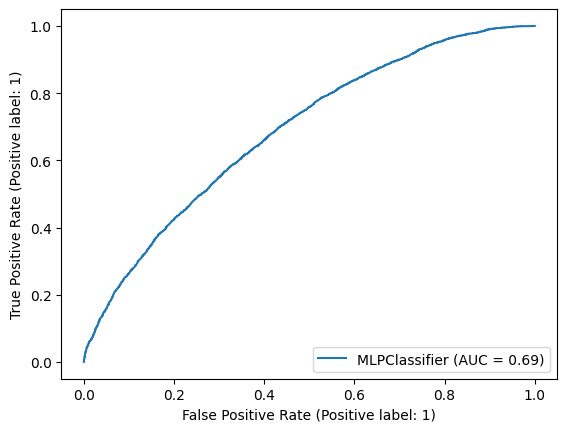

In [98]:
RocCurveDisplay.from_estimator(clf_mlp.best_estimator_, x_test, y_test)
plt.show();

### Стратегия голосования

In [99]:
data = pd.read_csv('data/df_sample.csv')
prepared_data = pd.DataFrame(ohe.transform(data), columns=list(ohe.get_feature_names_out()))

def voting(data):
    df_pred = pd.DataFrame({'logreg': clf_logreg.best_estimator_.predict(data), 
                            'rf': clf_rf.best_estimator_.predict(data), 
                            'mlp': clf_mlp.best_estimator_.predict(data)})
    df_pred['target'] = df_pred.apply(lambda x: mode(x), axis=1)
    return df_pred['target']

voting(prepared_data)

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: target, Length: 200, dtype: int64

In [100]:
voting(prepared_data).value_counts()

0    192
1      8
Name: target, dtype: int64

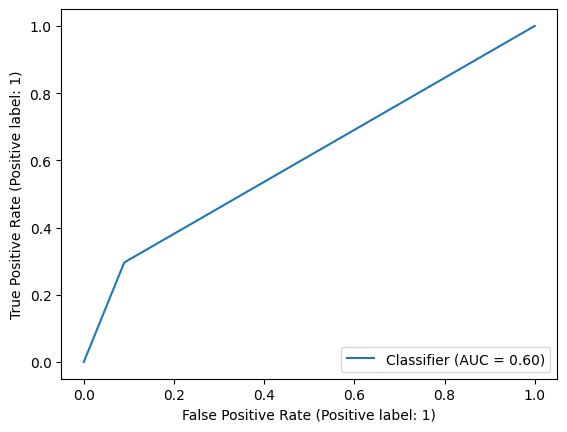

In [101]:
RocCurveDisplay.from_predictions(y, voting(x))
plt.show();

Для сравнения логистическая регрессия дает более точные результаты (в выбранном сэмпле распределение 50/50)

In [102]:
pd.DataFrame(clf_logreg.best_estimator_.predict(prepared_data)).value_counts()

0    132
1     68
dtype: int64

In [103]:
pd.DataFrame(clf_rf.best_estimator_.predict(prepared_data)).value_counts()

0    190
1     10
dtype: int64

In [104]:
pd.DataFrame(clf_mlp.best_estimator_.predict(prepared_data)).value_counts()

0    200
dtype: int64

## Results

Сохраним ohe в файл для использования в .py файле

In [112]:
filename = 'data/ohe.pkl'

with open(filename, 'wb') as file:
    pickle.dump(ohe, file)

Наилучшие результаты показывает модель логистической регрессии. Обучим модель на всем датасете

In [106]:
clf_logreg.best_estimator_.fit(x, y)

LogisticRegression(C=0.25, class_weight='balanced', random_state=12,
                   solver='liblinear', tol=1e-06)

Сохраним модель в формате pkl

In [117]:
model = clf_logreg
filename = 'data/model.pkl'
joblib.dump({
        'model': model.best_estimator_,
        'metadata': {
            'name': 'Sberavtopodpiska prediction model',
            'author': 'Vladimir Bocharov',
            'version': 1,
            'date': datetime.now(),
            'type': type(model.best_estimator_).__name__,
            'auc': model.best_score_
        }
    }, filename)

['data/model.pkl']